In [ ]:
# Required Libraries
import numpy  as np
import random
import os
resultant_fom=[]
# Function: Initialize Variables
def initial_position(swarm_size, min_values, max_values, target_function):
    position = np.zeros((swarm_size, len(min_values)+1))
    for i in range(0, swarm_size):
        for j in range(0, len(min_values)):
             position[i,j] = random.uniform(min_values[j], max_values[j])
        position[i,-1] = target_function(position[i,0:position.shape[1]-1])
    return position

############################################################################

# Function: Initialize Velocity
def initial_velocity(position, min_values, max_values):
    init_velocity = np.zeros((position.shape[0], len(min_values)))
    for i in range(0, init_velocity.shape[0]):
        for j in range(0, init_velocity.shape[1]):
            init_velocity[i,j] = random.uniform(min_values[j], max_values[j])
    return init_velocity

# Function: Individual Best
def individual_best_matrix(position, i_b_matrix): 
    for i in range(0, position.shape[0]):
        if(i_b_matrix[i,-1] > position[i,-1]):
            for j in range(0, position.shape[1]):
                i_b_matrix[i,j] = position[i,j]
    return i_b_matrix

# Function: Velocity
def velocity_vector(position, init_velocity, i_b_matrix, best_global, w = 0.5, c1 = 2, c2 = 2):
    r1       = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
    r2       = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
    velocity = np.zeros((position.shape[0], init_velocity.shape[1]))
    for i in range(0, init_velocity.shape[0]):
        for j in range(0, init_velocity.shape[1]):
            velocity[i,j] = w*init_velocity[i,j] + c1*r1*(i_b_matrix[i,j] - position[i,j]) + c2*r2*(best_global[j] - position[i,j])
    return velocity

# Function: Updtade Position
def update_position(position, velocity, min_values, max_values, target_function):
    for i in range(0, position.shape[0]):
        for j in range(0, position.shape[1] - 1):
            position[i,j] = np.clip((position[i,j] + velocity[i,j]),  min_values[j],  max_values[j])
        position[i,-1] = target_function(position[i,0:position.shape[1]-1])
    return position

############################################################################

# PSO Function
def particle_swarm_optimization(swarm_size, min_values, max_values, iterations, decay, w, c1, c2, target_function, verbose = True):    
    count         = 0
    position      = initial_position(swarm_size, min_values, max_values, target_function)
    init_velocity = initial_velocity(position, min_values, max_values)
    i_b_matrix    = np.copy(position)
    best_global   = np.copy(position[position[:,-1].argsort()][0,:])
    while (count <= iterations):
        if (verbose == True):
            print('Iteration = ', count, ' f(x) = ', best_global[-1])
        position    = update_position(position, init_velocity, min_values, max_values, target_function)             
        i_b_matrix  = individual_best_matrix(position, i_b_matrix)
        value       = np.copy(i_b_matrix[i_b_matrix[:,-1].argsort()][0,:])
        if (best_global[-1] > value[-1]):
            best_global = np.copy(value)   
        if (decay > 0):
            n  = decay
            w  = w*(1 - ((count-1)**n)/(iterations**n))
            c1 = (1-c1)*(count/iterations) + c1
            c2 = (1-c2)*(count/iterations) + c2
        init_velocity = velocity_vector(position, init_velocity, i_b_matrix, best_global, w = w, c1 = c1, c2 = c2)
        count         = count + 1 
    # resultant_fom.append(target_function(position[i,0:position.shape[1]-1]))    
    return best_global

Iteration =  0  f(x) =  6.510780162485301e-10
Iteration =  1  f(x) =  6.510780162485301e-10
Iteration =  2  f(x) =  6.510780162485301e-10
Iteration =  3  f(x) =  6.510780162485301e-10
Iteration =  4  f(x) =  6.510780162485301e-10
Iteration =  5  f(x) =  6.422307702769923e-10
Iteration =  6  f(x) =  6.422307702769923e-10
Iteration =  7  f(x) =  6.422307702769923e-10
Iteration =  8  f(x) =  6.383842092772791e-10
Iteration =  9  f(x) =  6.38055300461253e-10
Iteration =  10  f(x) =  6.38055300461253e-10
Iteration =  11  f(x) =  6.378356188136585e-10
Iteration =  12  f(x) =  6.378356188136585e-10
Iteration =  13  f(x) =  6.378356188136585e-10
Iteration =  14  f(x) =  6.378356188136585e-10
Iteration =  15  f(x) =  6.378356188136585e-10
Iteration =  16  f(x) =  6.378356188136585e-10
Iteration =  17  f(x) =  6.378356188136585e-10
Iteration =  18  f(x) =  6.378356188136585e-10
Iteration =  19  f(x) =  6.378356188136585e-10
Iteration =  20  f(x) =  6.378356188136585e-10
Iteration =  21  f(x) =  

[]

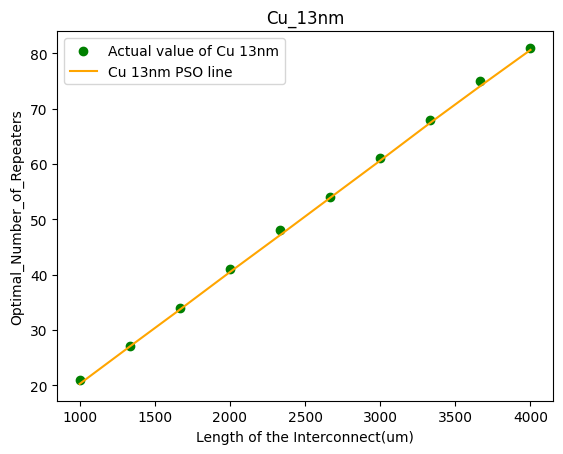

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# PSO - Parameters
parameters = {
    'swarm_size': 250,
    'min_values': (1, 1),
    'max_values': (100, 200),
    'iterations': 100,
    'decay': 0,
    'w': 0.9,
    'c1': 2,
    'c2': 2,
    'verbose': True
}
# PSO - Algorithm
length_interconnect = np.linspace(1000,4000,10)
res=[]
for length in length_interconnect:
  def Timedelay_function_Copper_13nm(x,l=length):
        R_Cu = 242.4
        L_Cu = 2.13e-12  
        C_Cu = 0.037842e-15
        R_t = (R_Cu*l)/x[1]
        C_t = (C_Cu*l)/x[1]
        R_d0 = 30.3e3
        R_T = R_d0/(x[0]*R_t)
        C_d0 = 0.22e-15
        C_l0 = 0.15e-15
        C_T = (x[0]*C_l0)/C_t
        ep = (R_t/2)*(math.sqrt(C_Cu/L_Cu))*((R_T+C_T+(R_T*C_T*(1+(C_d0/C_l0)))+0.5))/(math.sqrt(1+C_T))
        T_s = (1.48*ep + math.exp(-2.9*(ep**1.35)))*math.sqrt(((L_Cu*l)/x[1])*(C_Cu*l/x[1] +  x[0]*C_l0))
        return x[1]*T_s
  pso = particle_swarm_optimization(target_function = Timedelay_function_Copper_13nm, **parameters)
  variables = pso[:-1]
  minimum   = pso[ -1]
  res.append(np.around(variables, 4))
print(res)
length=[length_interconnect[i] for i in range(len(length_interconnect))]
optimal_repeater_size_13nm_pso_vs_length=[res[i][0] for i in range(len(res))]
optimal_repeater_number_13nm_pso_vs_length=[res[i][1] for i in range(len(res))]
#Cu_13nm
R_Cu = 242.4
L_Cu = 2.13e-12
C_Cu = 0.037842e-15
Rd = 30.3e3
C_d = 0.22e-15
Cl = 0.15e-15   
TL_R=math.sqrt(L_Cu/(R_Cu*Rd*(C_d + Cl)))
#Cu_13nm output for repeater size
repeater_size_computed_Cu_13nm_vs_length = math.sqrt((Rd*C_Cu)/(R_Cu*Cl))*(1/((1+(0.18*((TL_R)**3)))**(0.26)))
print(repeater_size_computed_Cu_13nm_vs_length)
x = (1+(0.18*((TL_R)**3)))**(0.3)
optimal_Cu_computed_13nm_vs_length = []
#Cu_13nm output for repeater number
for i in length_interconnect:
    optimal_Cu_computed_13nm_vs_length.append(math.ceil(i*(math.sqrt((R_Cu*C_Cu)/(2*Rd*(C_d + Cl)))*(1/x))))
plt.figure()
plt.title('Cu_13nm')
plt.scatter(length,optimal_Cu_computed_13nm_vs_length,color ='green',label='Actual value of Cu 13nm')
plt.plot(length,optimal_repeater_number_13nm_pso_vs_length,color = 'orange',label = 'Cu 13nm PSO line')
plt.xlabel('Length of the Interconnect(um)')
plt.ylabel('Optimal_Number_of_Repeaters')
plt.legend()
plt.plot()

Iteration =  0  f(x) =  1.3911609565120706e-09
Iteration =  1  f(x) =  1.3911609565120706e-09
Iteration =  2  f(x) =  1.3682828315843319e-09
Iteration =  3  f(x) =  1.3682828315843319e-09
Iteration =  4  f(x) =  1.3682828315843319e-09
Iteration =  5  f(x) =  1.3682828315843319e-09
Iteration =  6  f(x) =  1.3682828315843319e-09
Iteration =  7  f(x) =  1.3682828315843319e-09
Iteration =  8  f(x) =  1.357269903791742e-09
Iteration =  9  f(x) =  1.357269903791742e-09
Iteration =  10  f(x) =  1.350081938809071e-09
Iteration =  11  f(x) =  1.350081938809071e-09
Iteration =  12  f(x) =  1.350081938809071e-09
Iteration =  13  f(x) =  1.3497580820609141e-09
Iteration =  14  f(x) =  1.3497580820609141e-09
Iteration =  15  f(x) =  1.3497580820609141e-09
Iteration =  16  f(x) =  1.349356247751972e-09
Iteration =  17  f(x) =  1.349356247751972e-09
Iteration =  18  f(x) =  1.349356247751972e-09
Iteration =  19  f(x) =  1.349356247751972e-09
Iteration =  20  f(x) =  1.349356247751972e-09
Iteration = 

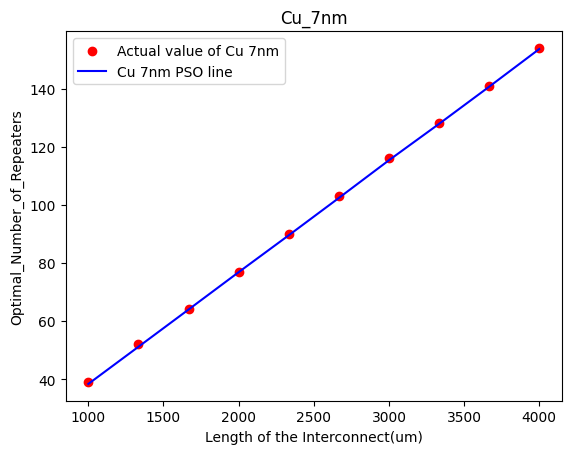

In [ ]:
res=[]
for length in length_interconnect:
  def Timedelay_function_Copper_7nm(x,l=length):
        R_Cu = 1226.7
        L_Cu = 2.24e-12
        C_Cu = 0.03177e-15
        R_t = (R_Cu*l)/x[1]
        C_t = (C_Cu*l)/x[1]
        R_d0 = 69.7e3
        R_T = R_d0/(x[0]*R_t)
        C_d0 = 0.13e-15
        C_l0 = 0.06e-15
        C_T = (x[0]*C_l0)/C_t
        ep = (R_t/2)*(math.sqrt(C_Cu/L_Cu))*((R_T+C_T+(R_T*C_T*(1+(C_d0/C_l0)))+0.5))/(math.sqrt(1+C_T))
        T_s = (1.48*ep + math.exp(-2.9*(ep**1.35)))*math.sqrt(((L_Cu*l)/x[1])*(C_Cu*l/x[1] +  x[0]*C_l0))
        return x[1]*T_s
  pso = particle_swarm_optimization(target_function = Timedelay_function_Copper_7nm, **parameters)
  variables = pso[:-1]
  minimum   = pso[ -1]
  res.append(np.around(variables, 4))
print(res)
length=[length_interconnect[i] for i in range(len(length_interconnect))]
optimal_repeater_size_7nm_pso_vs_length=[res[i][0] for i in range(len(res))]
optimal_repeater_number_7nm_pso_vs_length=[res[i][1] for i in range(len(res))]
#Cu_7nm
R_Cu = 1226.7
L_Cu = 2.24e-12
C_Cu = 0.03177e-15
Rd = 69.7e3
C_d = 0.13e-15
Cl = 0.06e-15
Cdl = C_d+Cl
TL_R=math.sqrt(L_Cu/(R_Cu*Rd*Cdl))
#Cu_7nm output for repeater size
repeater_size_computed_Cu_7nm_vs_length = math.sqrt((Rd*C_Cu)/(R_Cu*Cl))*(1/((1+(0.18*((TL_R)**3)))**(0.26)))
print(repeater_size_computed_Cu_7nm_vs_length)
x = (1+(0.18*((TL_R)**3)))**(0.3)
optimal_Cu_computed_7nm_vs_length = []
#Cu_7nm output for repeater number
for i in length_interconnect:
    optimal_Cu_computed_7nm_vs_length.append(math.ceil(i*(math.sqrt((R_Cu*C_Cu)/(2*Rd*(Cdl)))*(1/x))))
plt.figure()
plt.title('Cu_7nm')
plt.scatter(length,optimal_Cu_computed_7nm_vs_length,color ='red',label='Actual value of Cu 7nm')
plt.plot(length,optimal_repeater_number_7nm_pso_vs_length,color = 'blue',label = 'Cu 7nm PSO line')
plt.xlabel('Length of the Interconnect(um)')
plt.ylabel('Optimal_Number_of_Repeaters')
plt.legend()

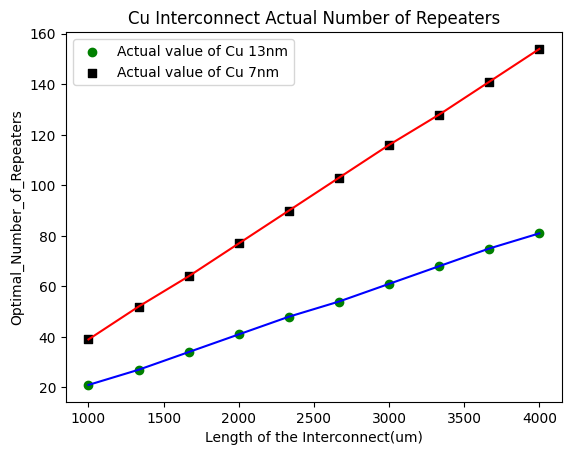

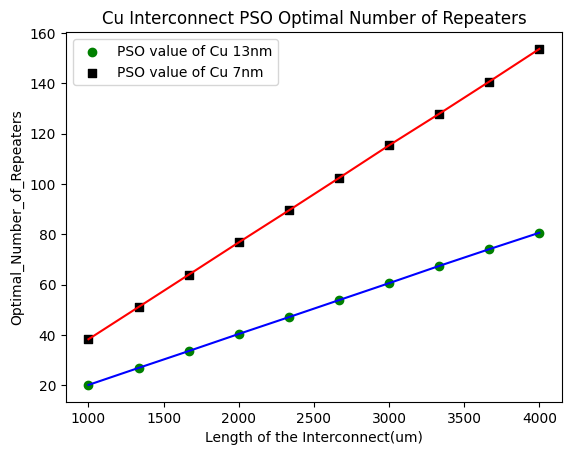

In [ ]:
plt.scatter(length,optimal_Cu_computed_13nm_vs_length,color ='green',label='Actual value of Cu 13nm')
plt.plot(length,optimal_Cu_computed_13nm_vs_length,color ='blue')
plt.scatter(length_interconnect,optimal_Cu_computed_7nm_vs_length,color ='black',label='Actual value of Cu 7nm',marker="s")
plt.plot(length_interconnect,optimal_Cu_computed_7nm_vs_length,color ='red')
plt.xlabel('Length of the Interconnect(um)')
plt.ylabel('Optimal_Number_of_Repeaters')
plt.legend()
plt.title('Cu Interconnect Actual Number of Repeaters')
plt.show()
plt.scatter(length,optimal_repeater_number_13nm_pso_vs_length,color ='green',label='PSO value of Cu 13nm')
plt.plot(length,optimal_repeater_number_13nm_pso_vs_length,color ='blue')
plt.scatter(length_interconnect,optimal_repeater_number_7nm_pso_vs_length,color ='black',label='PSO value of Cu 7nm',marker="s")
plt.plot(length_interconnect,optimal_repeater_number_7nm_pso_vs_length,color ='red')
plt.xlabel('Length of the Interconnect(um)')
plt.ylabel('Optimal_Number_of_Repeaters')
plt.legend()
plt.title('Cu Interconnect PSO Optimal Number of Repeaters')
plt.show()

In [ ]:
import math
AR= 2.34
C=1.2
lambda_Cu=37.3e-9
R_g=0.4
W_Cu=13e-9
d_g=W_Cu
rho_0=2.04e-8
p=list(range(1,101))
p_Cu_list=[0.01*ele for ele in p]
z_res=[]
for p_req in p_Cu_list:
  z=(3/8)*C*(1-p_req)*((1+AR)/AR)*(lambda_Cu/W_Cu)
  z_res.append(z)
print(z_res)
alpha=((lambda_Cu*R_g)/(1-R_g))*(1.0/d_g)
y=(1/3)/((1/3)-alpha/2+alpha**2-(alpha**3)*(math.log(1+(1/alpha))))
print(alpha)
final_rho= [rho_0*(y+z_r) for z_r in z_res]
R_pul=[(final_rho[i])*1e-6/(W_Cu*W_Cu*AR) for i in range(len(final_rho))]
print(R_pul)
L_Cu = 2.13e-12
C_Cu = 0.037842e-15
R_Cu=R_pul
Rd = 30.3e3

C_d = 0.22e-15
Cl = 0.15e-15
C_d1 = C_d + Cl  
TL_R=[math.sqrt(L_Cu/(R_pul[i]*Rd*(C_d + Cl))) for i in range(len(R_pul))]
#Cu_13nm output for repeater size
repeater_size_computed_Cu_13nm_vs_p = [math.sqrt((Rd*C_Cu)/(R_pul[i]*Cl))*(1/((1+(0.18*((TL_R[i])**3)))**(0.26)))for i in range(len(TL_R))]

[1.824499704142012, 1.8060704142011832, 1.7876411242603547, 1.7692118343195264, 1.750782544378698, 1.7323532544378697, 1.7139239644970412, 1.695494674556213, 1.6770653846153847, 1.6586360946745562, 1.6402068047337275, 1.6217775147928994, 1.6033482248520707, 1.5849189349112425, 1.566489644970414, 1.5480603550295857, 1.5296310650887572, 1.511201775147929, 1.4927724852071007, 1.4743431952662722, 1.4559139053254437, 1.4374846153846155, 1.419055325443787, 1.4006260355029585, 1.38219674556213, 1.3637674556213017, 1.3453381656804733, 1.3269088757396448, 1.3084795857988165, 1.290050295857988, 1.2716210059171595, 1.253191715976331, 1.2347624260355028, 1.2163331360946743, 1.197903846153846, 1.1794745562130178, 1.1610452662721893, 1.142615976331361, 1.1241866863905323, 1.105757396449704, 1.0873281065088756, 1.0688988165680473, 1.050469526627219, 1.0320402366863906, 1.013610946745562, 0.9951816568047338, 0.9767523668639054, 0.9583230769230768, 0.9398937869822485, 0.9214644970414201, 0.903035207100

[5.225145012633847, 5.234038726719293, 5.242978009860421, 5.251963252530745, 5.26099484990415, 5.270073201927886, 5.279198713396968, 5.288371794029979, 5.297592858546339, 5.306862326745048, 5.316180623584976, 5.325548179266673, 5.334965429315802, 5.344432814668184, 5.353950781756513, 5.363519782598775, 5.373140274888416, 5.382812722086289, 5.39253759351443, 5.40231536445171, 5.412146516231395, 5.422031536340663, 5.431970918522148, 5.441965162877504, 5.452014775973115, 5.462120270947919, 5.472282167623467, 5.482500992616237, 5.492777279452252, 5.5031115686840835, 5.513504408010282, 5.523956352397291, 5.534467964203927, 5.5450398133084535, 5.555672477238364, 5.566366541302883, 5.577122598728309, 5.58794125079623, 5.598823106984696, 5.609768785112451, 5.620778911486252, 5.631854121051396, 5.642995057545516, 5.65420237365574, 5.665476731179308, 5.6768188011876966, 5.6882292641943994, 5.699708810326428, 5.711258139499624, 5.722877961597905, 5.73456899665653, 5.746331975049511, 5.75816763768

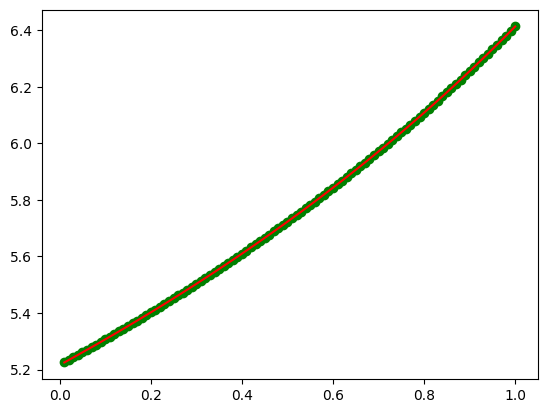

In [ ]:
import matplotlib.pyplot as plt
print(repeater_size_computed_Cu_13nm_vs_p)
arr=repeater_size_computed_Cu_13nm_vs_p
plt.scatter(p_Cu_list,repeater_size_computed_Cu_13nm_vs_p,color='green')
plt.plot(p_Cu_list,repeater_size_computed_Cu_13nm_vs_p,color='red')

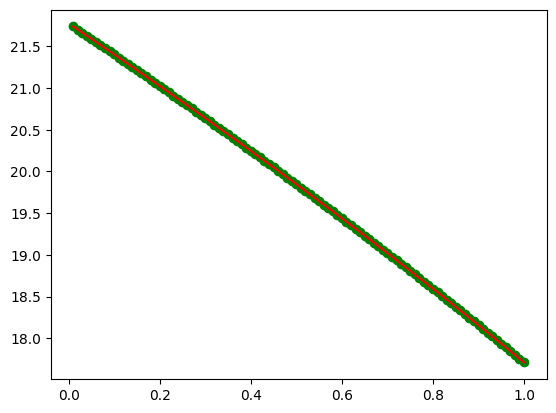

In [ ]:
optimal_Cu_computed_13nm_vs_p=[1000*(math.sqrt((R_pul[k]*C_Cu)/(2*Rd*(C_d+Cl)))*(1/(1+(0.18*((TL_R[k])**3)))**(0.3))) for k in range(len(R_pul))]
import matplotlib.pyplot as plt
arr1=optimal_Cu_computed_13nm_vs_p
plt.scatter(p_Cu_list,optimal_Cu_computed_13nm_vs_p,color='green')
plt.plot(p_Cu_list,optimal_Cu_computed_13nm_vs_p,color='red')

In [ ]:
print(res)

[array([ 5.4994, 38.3555]), array([ 5.4855, 51.1412]), array([ 5.4989, 63.9548]), array([ 5.4849, 76.8173]), array([ 5.4854, 89.5111]), array([  5.487 , 102.3579]), array([  5.4912, 115.3391]), array([  5.4843, 127.8601]), array([  5.4851, 140.6477]), array([  5.4867, 153.6187])]


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# PSO - Parameters
parameters = {
    'swarm_size': 250,
    'min_values': (1, 1),
    'max_values': (100, 200),
    'iterations': 10,
    'decay': 0,
    'w': 0.9,
    'c1': 2,
    'c2': 2,
    'verbose': True
}
res_p=[]
for p in p_Cu_list:
  def Timedelay_function_Copper_13nm_p_req(x,p_req=p):
        l=1000
        lambda_Cu=37.3e-9
        R_g=0.4
        W_Cu=13e-9
        d_g=W_Cu
        AR=2.34
        C=1.2
        rho_0=2.04e-8
        # p_req=1.0
        L_Cu = 2.13e-12  
        C_Cu = 0.037842e-15
        # p_req=p_req
        alpha=((lambda_Cu*R_g)/((1-R_g)*(d_g)))
        y=(1/3)/((1/3)-alpha/2+alpha**2-(alpha**3)*(math.log(1+(1/alpha))))
        z=(3/8)*C*(1-p_req)*((1+AR)/AR)*(lambda_Cu/W_Cu)
        res_list = rho_0*(y+z)
        R_pul=(res_list)*1e-6/(W_Cu*W_Cu*AR)
        R_Cu=R_pul
        print(R_Cu)
        R_t = (R_Cu*l)/x[1]
        C_t = (C_Cu*l)/x[1]
        R_d0 = 30.3e3
        R_T = R_d0/(x[0]*R_t)
        C_d0 = 0.22e-15
        C_l0 = 0.15e-15
        C_T = (x[0]*C_l0)/C_t
        TL_R=math.sqrt(L_Cu/(R_pul*Rd*(C_d + Cl)))
        x[0]=math.sqrt((Rd*C_Cu)/(R_pul*Cl))*(1/((1+(0.18*((TL_R)**3)))**(0.26)))
        x[1]=(1000*(math.sqrt((R_pul*C_Cu)/(2*Rd*(C_d0+C_l0)))*(1/(1+(0.18*((TL_R)**3)))**(0.3))))
        ep = (R_t/2)*(math.sqrt(C_Cu/L_Cu))*((R_T+C_T+(R_T*C_T*(1+(C_d0/C_l0)))+0.5))/(math.sqrt(1+C_T))
        T_s = (1.48*ep + math.exp(-2.9*(ep**1.35)))*math.sqrt(((L_Cu*l)/x[1])*(C_Cu*l/x[1] +  x[0]*C_l0))
        return x[1]*T_s
  pso = particle_swarm_optimization(target_function = Timedelay_function_Copper_13nm_p_req, **parameters)
  variables = pso[:-1]
  minimum   = pso[ -1]
  res_p.append(np.around(variables, 4))
  print(res_p)

Streaming output truncated to the last 5000 lines.
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112
186.81362530805112

In [ ]:
optimal_repeater_size_13nm_pso_vs_p=[res_p[i][0] for i in range(len(res_p))]
optimal_repeater_number_13nm_pso_vs_p=[res_p[i][1] for i in range(len(res_p))]
print(optimal_repeater_size_13nm_pso_vs_p)

[5.2251, 5.234, 5.243, 5.252, 5.261, 5.2701, 5.2792, 5.2884, 5.2976, 5.3069, 5.3162, 5.3255, 5.335, 5.3444, 5.354, 5.3635, 5.3731, 5.3828, 5.3925, 5.4023, 5.4121, 5.422, 5.432, 5.442, 5.452, 5.4621, 5.4723, 5.4825, 5.4928, 5.5031, 5.5135, 5.524, 5.5345, 5.545, 5.5557, 5.5664, 5.5771, 5.5879, 5.5988, 5.6098, 5.6208, 5.6319, 5.643, 5.6542, 5.6655, 5.6768, 5.6882, 5.6997, 5.7113, 5.7229, 5.7346, 5.7463, 5.7582, 5.7701, 5.7821, 5.7941, 5.8063, 5.8185, 5.8308, 5.8431, 5.8556, 5.8681, 5.8807, 5.8934, 5.9061, 5.919, 5.9319, 5.945, 5.9581, 5.9713, 5.9846, 5.9979, 6.0114, 6.0249, 6.0386, 6.0523, 6.0662, 6.0801, 6.0941, 6.1082, 6.1225, 6.1368, 6.1512, 6.1657, 6.1804, 6.1951, 6.2099, 6.2249, 6.2399, 6.2551, 6.2704, 6.2857, 6.3013, 6.3169, 6.3326, 6.3485, 6.3644, 6.3805, 6.3967, 6.4131]


#Calculation for 7nm

In [ ]:
lambda_Cu=37.3e-9
import numpy as np
R_g=0.4

In [ ]:
W_Cu=7e-9
d_g=W_Cu
alpha=((lambda_Cu*R_g)/(1-R_g))*(1.0/d_g)
#alpha=(lambda_Cu* R_g)/(d_g*(1-R_g))
print(alpha)
import math

3.5523809523809526


In [ ]:
AR=2.4
C=1.2
p_Cu=0.41
rho_0=2.04e-8

In [ ]:
alpha
y=(1/3)/((1/3)-alpha/2+alpha**2-(alpha**3)*(math.log(1+(1/alpha))))

In [ ]:
p=list(range(1,101))
p_Cu_list=[0.01*ele for ele in p]
z_res=[]
for p_req in p_Cu_list:
  z=(3/8)*C*(1-p_req)*((1+AR)/AR)*(lambda_Cu/W_Cu)
  z_res.append(z)
print(z_res)

[3.362994642857143, 3.329025, 3.295055357142857, 3.2610857142857146, 3.2271160714285716, 3.1931464285714286, 3.1591767857142856, 3.1252071428571435, 3.0912375000000005, 3.0572678571428575, 3.0232982142857145, 2.9893285714285716, 2.9553589285714286, 2.921389285714286, 2.887419642857143, 2.85345, 2.819480357142857, 2.785510714285715, 2.751541071428572, 2.717571428571429, 2.683601785714286, 2.649632142857143, 2.6156625000000004, 2.5816928571428575, 2.5477232142857145, 2.5137535714285715, 2.479783928571429, 2.445814285714286, 2.411844642857143, 2.377875, 2.3439053571428574, 2.3099357142857144, 2.2759660714285714, 2.2419964285714284, 2.2080267857142855, 2.174057142857143, 2.1400875000000004, 2.1061178571428574, 2.0721482142857144, 2.0381785714285714, 2.004208928571429, 1.970239285714286, 1.936269642857143, 1.9023000000000003, 1.8683303571428576, 1.8343607142857146, 1.8003910714285716, 1.7664214285714288, 1.7324517857142858, 1.6984821428571428, 1.6645125, 1.6305428571428573, 1.59657321428571

In [ ]:
final_rho= [rho_0*(y+z_r) for z_r in z_res]

In [ ]:
R_pul=[(final_rho[i])*1e-6/(W_Cu*W_Cu*AR) for i in range(len(final_rho))]
print(R_pul)
L_Cu = 2.24e-12
C_Cu = 0.03177e-15
Rd = 69.7e3
C_d = 0.13e-15
Cl = 0.06e-15

[1588.5708952167327, 1582.6782020680444, 1576.7855089193563, 1570.8928157706682, 1565.0001226219804, 1559.1074294732923, 1553.214736324604, 1547.3220431759164, 1541.429350027228, 1535.53665687854, 1529.643963729852, 1523.7512705811637, 1517.8585774324758, 1511.9658842837878, 1506.0731911351, 1500.1804979864116, 1494.2878048377236, 1488.3951116890357, 1482.5024185403474, 1476.6097253916594, 1470.7170322429715, 1464.8243390942835, 1458.9316459455956, 1453.0389527969073, 1447.146259648219, 1441.2535664995312, 1435.3608733508431, 1429.4681802021553, 1423.5754870534668, 1417.682793904779, 1411.790100756091, 1405.897407607403, 1400.004714458715, 1394.1120213100264, 1388.2193281613386, 1382.3266350126507, 1376.4339418639627, 1370.5412487152748, 1364.6485555665868, 1358.7558624178985, 1352.8631692692106, 1346.9704761205223, 1341.0777829718345, 1335.1850898231467, 1329.2923966744584, 1323.3997035257705, 1317.5070103770822, 1311.6143172283942, 1305.721624079706, 1299.828930931018, 1293.936237782

In [ ]:
TL_R=[math.sqrt(L_Cu/(R_pul[i]*Rd*(C_d + Cl))) for i in range(len(R_pul))]
#Cu_7nm output for repeater size
repeater_size_computed_Cu_7nm_vs_p = [math.sqrt((Rd*C_Cu)/(R_pul[i]*Cl))*(1/((1+(0.18*((TL_R[i])**3)))**(0.26)))for i in range(len(TL_R))]

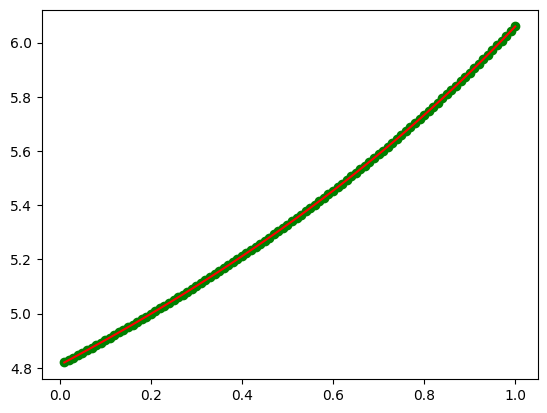

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(p_Cu_list,repeater_size_computed_Cu_7nm_vs_p,color='green')
plt.plot(p_Cu_list,repeater_size_computed_Cu_7nm_vs_p,color='red')

In [ ]:
optimal_Cu_computed_7nm_vs_p=[1000*(math.sqrt((R_pul[k]*C_Cu)/(2*Rd*(C_d+Cl)))*(1/(1+(0.18*((TL_R[k])**3)))**(0.3))) for k in range(len(R_pul))]

In [ ]:
optimal_Cu_computed_7nm_vs_p

[43.65195461544911,
 43.57091743732349,
 43.489729257705626,
 43.40838922932567,
 43.32689649696059,
 43.245250197329355,
 43.16344945898609,
 43.081493402211706,
 42.999381138903416,
 42.9171117724625,
 42.83468439768005,
 42.752098100620806,
 42.66935195850492,
 42.58644503958758,
 42.503376403036754,
 42.42014509880843,
 42.336750167520044,
 42.253190640321336,
 42.169465538763,
 42.085573874663154,
 42.00151464997112,
 41.917286856628934,
 41.83288947643036,
 41.74832148087719,
 41.66358183103307,
 41.57866947737458,
 41.49358335963956,
 41.40832240667261,
 41.322885536267854,
 41.23727165500862,
 41.151479658104115,
 41.06550842922322,
 40.9793568403249,
 40.89302375148555,
 40.80650801072307,
 40.719808453817436,
 40.632923904127985,
 40.54585317240703,
 40.458595056609994,
 40.37114834170182,
 40.28351179945948,
 40.1956841882708,
 40.10766425292915,
 40.019450724424175,
 39.93104231972833,
 39.842437741579175,
 39.75363567825723,
 39.66463480335947,
 39.5754337755681,
 39.48603

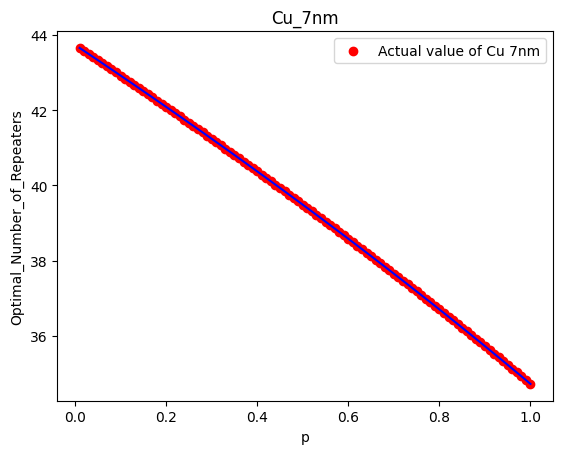

In [ ]:
plt.figure()
#plt.subplot(2,2,1)
plt.title('Cu_7nm')
plt.scatter(p_Cu_list,optimal_Cu_computed_7nm_vs_p,color ='red',label='Actual value of Cu 7nm')
plt.plot(p_Cu_list,optimal_Cu_computed_7nm_vs_p,color ='blue')
#plt.plot(length_interconnect,Opt_Rep_Number_Cu_7nm,color = 'blue',label = 'Cu 7nm PSO line')
plt.xlabel('p')
plt.ylabel('Optimal_Number_of_Repeaters')
plt.legend()
plt.show()

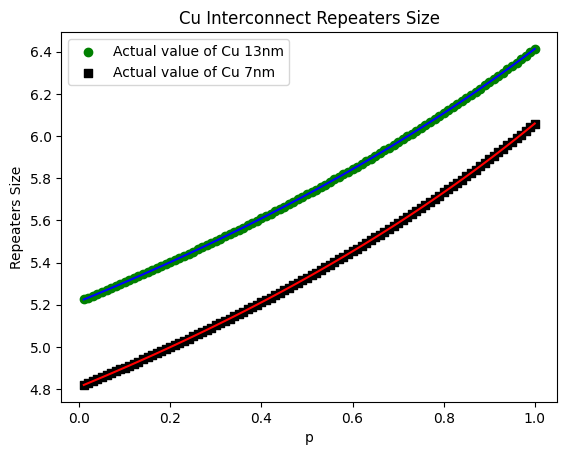

In [ ]:
plt.scatter(p_Cu_list,repeater_size_computed_Cu_13nm_vs_p,color ='green',label='Actual value of Cu 13nm')
plt.plot(p_Cu_list,repeater_size_computed_Cu_13nm_vs_p,color ='blue')
plt.scatter(p_Cu_list,repeater_size_computed_Cu_7nm_vs_p,color ='black',label='Actual value of Cu 7nm',marker="s")
plt.plot(p_Cu_list,repeater_size_computed_Cu_7nm_vs_p,color ='red')
plt.xlabel('p')
plt.ylabel('Repeaters Size')
plt.legend()
plt.title('Cu Interconnect Repeaters Size')
plt.show()

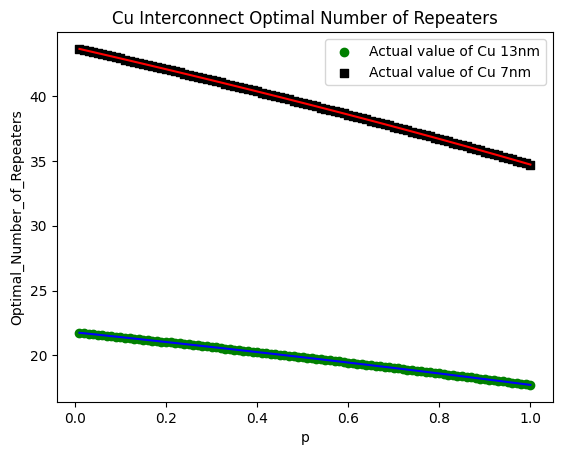

In [ ]:
plt.scatter(p_Cu_list,optimal_Cu_computed_13nm_vs_p,color ='green',label='Actual value of Cu 13nm')
plt.plot(p_Cu_list,optimal_Cu_computed_13nm_vs_p,color ='blue')
plt.scatter(p_Cu_list,optimal_Cu_computed_7nm_vs_p,color ='black',label='Actual value of Cu 7nm',marker="s")
plt.plot(p_Cu_list,optimal_Cu_computed_7nm_vs_p,color ='red')
plt.xlabel('p')
plt.ylabel('Optimal_Number_of_Repeaters')
plt.legend()
plt.title('Cu Interconnect Optimal Number of Repeaters')
plt.show()

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# PSO - Parameters
parameters = {
    'swarm_size': 250,
    'min_values': (1, 1),
    'max_values': (100, 200),
    'iterations': 50,
    'decay': 0,
    'w': 0.9,
    'c1': 2,
    'c2': 2,
    'verbose': True
}
res=[]
for p in p_Cu_list:
  def Timedelay_function_Copper_7nm_p_req(x,p_req=p):
        l=1000
        lambda_Cu=37.3e-9
        R_g=0.4
        W_Cu=7e-9
        d_g=W_Cu
        AR=2.34
        C=1.2
        rho_0=2.04e-8
        # p_req=1.0
        L_Cu = 2.24e-12  
        C_Cu = 0.03177e-15
        # p_req=p_req
        alpha=((lambda_Cu*R_g)/((1-R_g)*(d_g)))
        y=(1/3)/((1/3)-alpha/2+alpha**2-(alpha**3)*(math.log(1+(1/alpha))))
        z=(3/8)*C*(1-p_req)*((1+AR)/AR)*(lambda_Cu/W_Cu)
        res_list = rho_0*(y+z)
        R_pul=(res_list)*1e-6/(W_Cu*W_Cu*AR)
        R_Cu=R_pul
        # print(R_Cu)
        R_t = (R_Cu*l)/x[1]
        C_t = (C_Cu*l)/x[1]
        R_d0 = 69.7e3
        R_T = R_d0/(x[0]*R_t)
        C_d0 = 0.13e-15
        C_l0 = 0.06e-15
        C_T = (x[0]*C_l0)/C_t
        TL_R=math.sqrt(L_Cu/(R_pul*Rd*(C_d0 + C_l0)))
        # x[0]=math.sqrt((Rd*C_Cu)/(R_pul*Cl))*(1/((1+(0.18*((TL_R)**3)))**(0.26)))
        # x[1]=(1000*(math.sqrt((R_pul*C_Cu)/(2*Rd*(C_d0+C_l0)))*(1/(1+(0.18*((TL_R)**3)))**(0.3))))
        ep = (R_t/2)*(math.sqrt(C_Cu/L_Cu))*((R_T+C_T+(R_T*C_T*(1+(C_d0/C_l0)))+0.5))/(math.sqrt(1+C_T))
        T_s = (1.48*ep + math.exp(-2.9*(ep**1.35)))*math.sqrt(((L_Cu*l)/x[1])*(C_Cu*l/x[1] +  x[0]*C_l0))
        return x[1]*T_s
  pso = particle_swarm_optimization(target_function = Timedelay_function_Copper_7nm_p_req, **parameters)
  variables = pso[:-1]
  minimum   = pso[ -1]
  res.append(np.around(variables, 4))
  print(res)

Streaming output truncated to the last 5000 lines.
Iteration =  44  f(x) =  1.5485359226735041e-09
Iteration =  45  f(x) =  1.5485359226735041e-09
Iteration =  46  f(x) =  1.5485359226735041e-09
Iteration =  47  f(x) =  1.5485359226735041e-09
Iteration =  48  f(x) =  1.5485359226735041e-09
Iteration =  49  f(x) =  1.5485359226735041e-09
Iteration =  50  f(x) =  1.5485359226735041e-09
[array([ 4.7585, 44.2175]), array([ 4.7337, 44.2168]), array([ 4.7686, 44.1164]), array([ 4.7178, 44.0465])]
Iteration =  0  f(x) =  1.548912140898846e-09
Iteration =  1  f(x) =  1.548912140898846e-09
Iteration =  2  f(x) =  1.548912140898846e-09
Iteration =  3  f(x) =  1.548912140898846e-09
Iteration =  4  f(x) =  1.548912140898846e-09
Iteration =  5  f(x) =  1.548912140898846e-09
Iteration =  6  f(x) =  1.548912140898846e-09
Iteration =  7  f(x) =  1.548912140898846e-09
Iteration =  8  f(x) =  1.548912140898846e-09
Iteration =  9  f(x) =  1.5467898666849259e-09
Iteration =  10  f(x) =  1.5467898666849259

In [ ]:
optimal_repeater_size_7nm_pso_vs_p=[res[i][0] for i in range(len(res))]
optimal_repeater_number_7nm_pso_vs_p=[res[i][1] for i in range(len(res))]

In [ ]:
optimal_repeater_size_7nm_pso_vs_p

[4.7585,
 4.7337,
 4.7686,
 4.7178,
 4.7857,
 4.7884,
 4.8091,
 4.8183,
 4.8496,
 4.8274,
 4.8488,
 4.8523,
 4.8626,
 4.8775,
 4.9094,
 4.8967,
 4.8943,
 4.9121,
 4.9232,
 4.9292,
 4.9249,
 4.96,
 4.958,
 4.9646,
 4.9784,
 5.0289,
 4.9876,
 5.0573,
 5.0055,
 5.0262,
 5.0491,
 5.0554,
 5.0549,
 5.0727,
 5.0883,
 5.1149,
 5.1035,
 5.1078,
 5.1582,
 5.1299,
 5.14,
 5.176,
 5.1619,
 5.1788,
 5.2001,
 5.2119,
 5.2433,
 5.2287,
 5.2507,
 5.2643,
 5.2352,
 5.2521,
 5.2706,
 5.3581,
 5.3094,
 5.3327,
 5.3257,
 5.3293,
 5.3739,
 5.3935,
 5.3956,
 5.4017,
 5.425,
 5.4376,
 5.395,
 5.4415,
 5.4211,
 5.4867,
 5.5185,
 5.5155,
 5.4608,
 5.5442,
 5.5637,
 5.5778,
 5.6397,
 5.6165,
 5.6198,
 5.657,
 5.6637,
 5.682,
 5.689,
 5.6654,
 5.7448,
 5.7102,
 5.7055,
 5.7521,
 5.7655,
 5.7653,
 5.7999,
 5.8127,
 5.8299,
 5.8507,
 5.8699,
 5.9025,
 5.954,
 5.9189,
 5.9282,
 5.957,
 5.9631,
 5.989]

In [ ]:
optimal_repeater_number_7nm_pso_vs_p

[44.2175,
 44.2168,
 44.1164,
 44.0465,
 43.9471,
 44.0492,
 43.6636,
 43.6884,
 43.4906,
 43.4421,
 43.449,
 43.1224,
 42.9354,
 43.2177,
 43.1079,
 43.1537,
 42.7664,
 42.9177,
 42.7983,
 42.6622,
 42.8089,
 42.6355,
 42.487,
 42.2425,
 42.2736,
 42.1808,
 42.092,
 41.8229,
 41.7158,
 41.6568,
 41.9353,
 41.5705,
 41.6021,
 41.4521,
 41.3398,
 41.1168,
 41.2008,
 40.7462,
 40.9824,
 40.9094,
 40.7688,
 40.5776,
 40.68,
 40.4894,
 40.5853,
 40.3755,
 40.4324,
 40.0767,
 40.1712,
 39.9972,
 39.9112,
 39.8378,
 39.8169,
 39.7813,
 39.5397,
 39.4934,
 39.3004,
 39.164,
 39.2862,
 39.0237,
 39.022,
 38.8987,
 38.7528,
 38.6778,
 38.4832,
 38.6514,
 38.3315,
 38.3899,
 38.3133,
 38.0167,
 37.8504,
 37.9553,
 37.7887,
 37.7764,
 37.6366,
 37.5289,
 37.5111,
 37.5619,
 37.3829,
 37.2034,
 36.6888,
 37.1088,
 36.8493,
 36.7641,
 36.7628,
 36.6649,
 36.5129,
 36.335,
 36.3114,
 36.132,
 36.2562,
 36.1804,
 35.9211,
 35.8481,
 35.9154,
 35.6827,
 35.5285,
 35.3115,
 35.3257,
 35.1594]

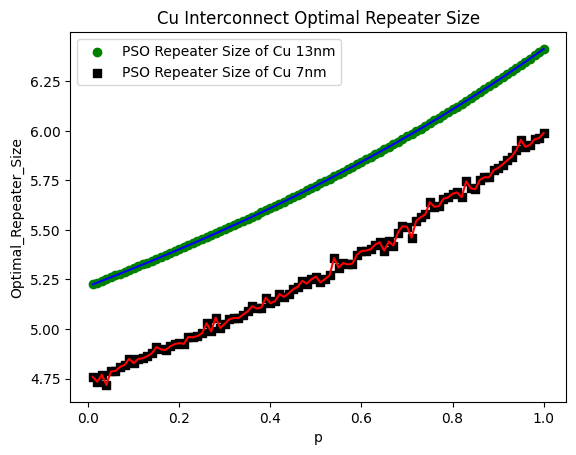

In [ ]:
plt.scatter(p_Cu_list,optimal_repeater_size_13nm_pso_vs_p,color ='green',label='PSO Repeater Size of Cu 13nm')
plt.plot(p_Cu_list,optimal_repeater_size_13nm_pso_vs_p,color ='blue')
plt.scatter(p_Cu_list,optimal_repeater_size_7nm_pso_vs_p,color ='black',label='PSO Repeater Size of Cu 7nm',marker="s")
plt.plot(p_Cu_list,optimal_repeater_size_7nm_pso_vs_p,color ='red')
plt.xlabel('p')
plt.ylabel('Optimal_Repeater_Size')
plt.legend()
plt.title('Cu Interconnect Optimal Repeater Size')
plt.show()

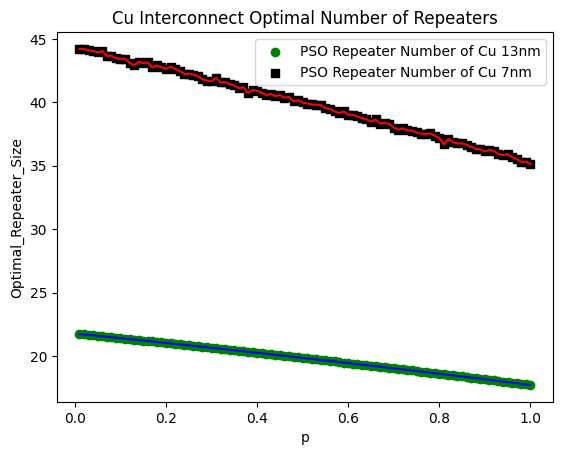

In [ ]:
plt.scatter(p_Cu_list,optimal_repeater_number_13nm_pso_vs_p,color ='green',label='PSO Repeater Number of Cu 13nm')
plt.plot(p_Cu_list,optimal_repeater_number_13nm_pso_vs_p,color ='blue')
plt.scatter(p_Cu_list,optimal_repeater_number_7nm_pso_vs_p,color ='black',label='PSO Repeater Number of Cu 7nm',marker="s")
plt.plot(p_Cu_list,optimal_repeater_number_7nm_pso_vs_p,color ='red')
plt.xlabel('p')
plt.ylabel('Optimal_Repeater_Size')
plt.legend()
plt.title('Cu Interconnect Optimal Number of Repeaters')
plt.show()